In [1]:
from scipy.stats import pearsonr
from init import *


Getting english data
Getting french data
Getting emotion words and bird names


No HTE entry: enthrallment
No HTE entry: bluejay
No HTE entry: geese
Emotion, Pearson correlation between first record and prototypicality: r = -0.366168, p-value = 0.000013, n = 135
Rosch, Pearson correlation between first record and prototypicality: r = -0.065745, p-value = 0.643313, n = 52


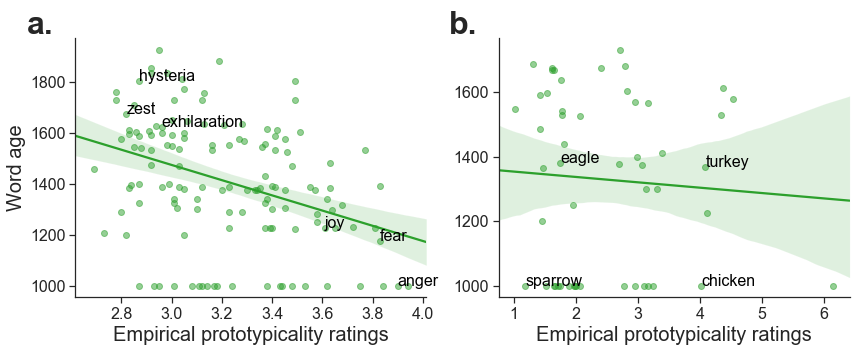

In [2]:
# do some analysis on prototypicality ratings and time
def plot_word_age(ax, p, a, colour='tab:green'):
    df = pd.DataFrame({
        'prototypicality': p, 
        'age': a, 
    }) 
    ax.scatter(p, a, color=colour, alpha=0.5)
    ax = sns.regplot(ax=ax, x="prototypicality", y="age", scatter=False, color=colour, data=df)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16) 
    ax.set_xlabel('Empirical prototypicality ratings', fontsize=20)
    ax.set_ylabel('Word age', fontsize=20)
    return ax

from helpers_HTE import *
eng_examples = [
    'hysteria', 'zest', 'exhilaration',
    'joy', 'anger', 'fear',
]
example_birds = ['eagle', 'sparrow', 'chicken', 'turkey', ]

_, first_emotion = get_senses(HTE_senses % ('n', TABLE1_1987), words_eng, 1980)
_, first_rosch = get_senses(HTE_senses % ('n', ROSCH_1975), words_rosch, 1980)

words_eng_HTE = list(set(words_eng) & set(first_emotion.keys()))
words_rosch_HTE = list(set(words_rosch) & set(first_rosch.keys()))

s = 'Pearson correlation between first record and prototypicality: r = %f, p-value = %f, n = %d'
print('Emotion, ' + s % corr_proto_HTE(words_eng_HTE, first_emotion, proto))
print('Rosch, ' + s % corr_proto_HTE(words_rosch_HTE, first_rosch, proto_rosch))

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12, 5))

tempx = [proto[w] for w in words_eng_HTE]
tempy = [first_emotion[w] for w in words_eng_HTE]
plot_word_age(axes[0], tempx, tempy)
annotate_scatter(axes[0], eng_examples, words_eng_HTE, tempx, tempy)

tempx = [proto_rosch[w] for w in words_rosch_HTE]
tempy = [first_rosch[w] for w in words_rosch_HTE]
plot_word_age(axes[1], tempx, tempy)
annotate_scatter(axes[1], example_birds, words_rosch_HTE, tempx, tempy)

axes[1].set_ylabel('')
axes[0].annotate('a.',
            xy=(-0.1, 0.925), xytext=(-0.1, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=32, weight='bold', ha='center', va='center')
axes[1].annotate('b.',
            xy=(-0.1, 0.925), xytext=(-0.1, 0.95),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=32, weight='bold', ha='center', va='center')

sns.despine()
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/word_age.'+img_format, format=img_format, bbox_inches='tight')

